In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
"""
Change directory to where this file is located
"""
%cd '/content/drive/MyDrive/MLVU/Project/Inference_With_Freq_Sent_Source'

/content/drive/MyDrive/MLVU/Project/Inference_With_Freq_Sent_Source


In [3]:
import torch
from modules.ESRGAN import create_ESRGAN_model, downscale_image

SR_model = create_ESRGAN_model()


In [44]:
import numpy as np
my_test_image_original = Image.open("./Inf_DATA/thomas.jpg").convert("RGB")
tensor_image = tf.keras.preprocessing.image.img_to_array(my_test_image_original)
print(np.max(tensor_image))
resized_image = tf.image.resize(tensor_image,(450,450))
print(np.max(resized_image))
down_sized_image = downscale_image(resized_image)
print(np.max(down_sized_image))
model_out = tf.cast(tf.clip_by_value(tf.squeeze(model(down_sized_image)), 0, 255), tf.uint8)
print(np.max(model(down_sized_image)))

255.0
252.12782
237.0
244.12709


torch.float32
torch.float32


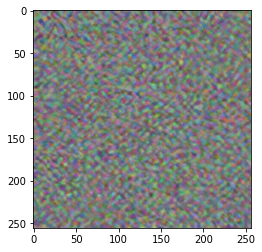

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
#torch.Size([1, 3, 256, 256])
test = torch.rand((1, 3, 256, 256))
test = test.squeeze().permute(1,2,0)
print(test.dtype)
#plt.imshow(test)
test = torch.round(test*255.)  #Implement this
test = test.type(torch.LongTensor)  #Implement this

lol = downscale_image(test, 4)
lol1 = SR_model(lol)
lol1 = tf.cast(tf.clip_by_value(lol1, 0, 255),tf.uint8)  #Implement this
lol1 = lol1.numpy()
lol1 = torch.Tensor(lol1).type(torch.LongTensor)  #Implement this
lol1 = lol1/255  #Implement this
#lol = torch.clamp(lol.type(torch.FloatTensor), 0, 1)
print(lol1.dtype)
plt.imshow(lol1[0])

#res = model(lol)
#res = res.numpy()
#res = torch.Tensor(res)
#res=res.permute(0,3,1,2)
#res.shape


<tf.Tensor: shape=(1, 672, 672, 3), dtype=float32, numpy=
array([[[[ 0.13953294,  0.08974521,  0.26193315],
         [ 0.10759731,  0.02408096,  0.2551867 ],
         [ 0.05257685, -0.04057154,  0.11100904],
         ...,
         [-0.06828843, -0.06645034, -0.16250136],
         [ 0.01088985, -0.10546526, -0.15960985],
         [ 0.05876648, -0.01553513, -0.10228413]],

        [[ 0.15728015,  0.19378233,  0.36043662],
         [-0.02568184,  0.00875128,  0.21783824],
         [-0.11685442, -0.11865933,  0.05501074],
         ...,
         [-0.3127648 , -0.37676397, -0.4188468 ],
         [-0.18664818, -0.25804698, -0.3946349 ],
         [ 0.02700058, -0.10408424, -0.2782278 ]],

        [[ 0.09920192,  0.09615303,  0.20651357],
         [-0.09107821, -0.12812304,  0.04437334],
         [-0.04587171, -0.12832785,  0.03475785],
         ...,
         [-0.22323434, -0.27959496, -0.35421363],
         [-0.10757502, -0.29852238, -0.35828444],
         [-0.0919304 , -0.1920203 , -0.3611645